<a href="https://colab.research.google.com/github/SantiagoMorenoV/Combined-Cycle-Power-Plant/blob/main/Models/Combined_Cycle_Power_Plant_Dec_Tree_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Combined Cycle Power Plant - Decision Tree Regression**

The "Combined Cycle Power Plant" dataset contains the following features (variables):

* **Temperature (T):** The temperature measured in °C.

* **Ambient Pressure (AP):** The ambient pressure measured in millibars.

* **Relative Humidity (RH):** The relative humidity measured in percent.

* **Exhaust Vacuum (V):** The exhaust vacuum measured in cm Hg.

* **Electrical Energy Output (EP):** The electrical energy output of the power plant measured in MW.

These features are used to estimate the electrical energy output of a combined cycle power plant. Each instance in the dataset represents a specific combination of these features and the corresponding electrical energy output.

For this purpose, I will estimate a *decision tree regression* model and obtain its determination coefficient.

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Importing the dataset

In [3]:
dataset = pd.read_csv('CCPP_data.csv')
X = dataset.iloc[:, :-1].values
y=  dataset.iloc[:, -1].values
dataset.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


#**Descriptive Statistics**

In [4]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe())


              Descriptive Statistics              
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


##**Distributions and Boxplots**

## **Histograms**

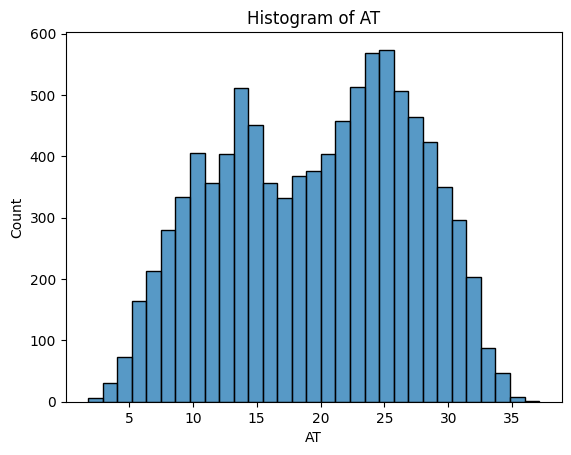

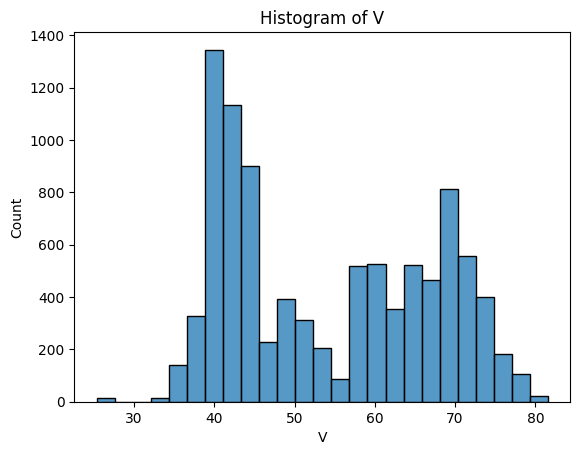

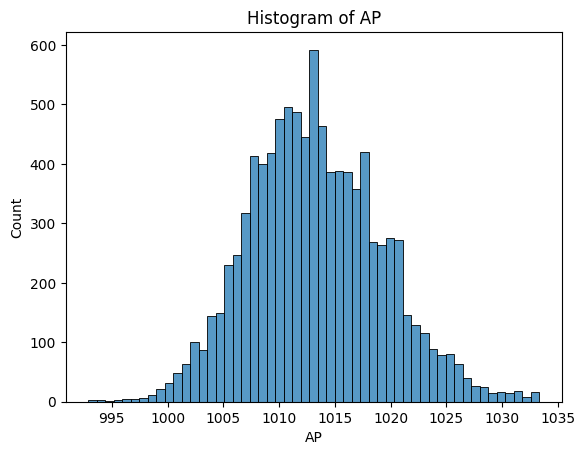

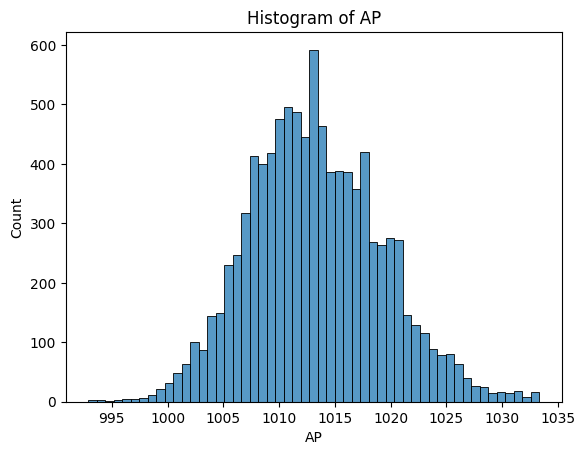

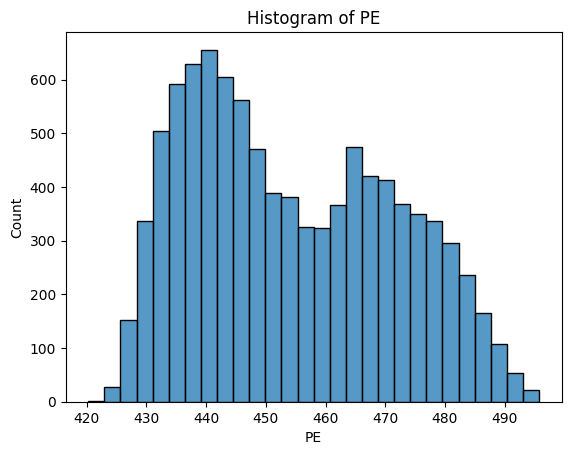

In [5]:
# Selecting our variables
variables = ["AT", "V", "AP", "AP", "PE"]

# Creating histograms
for var in variables:
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

##**Boxplots**

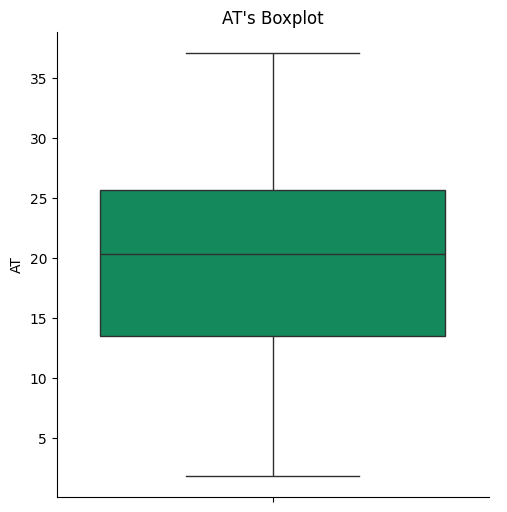

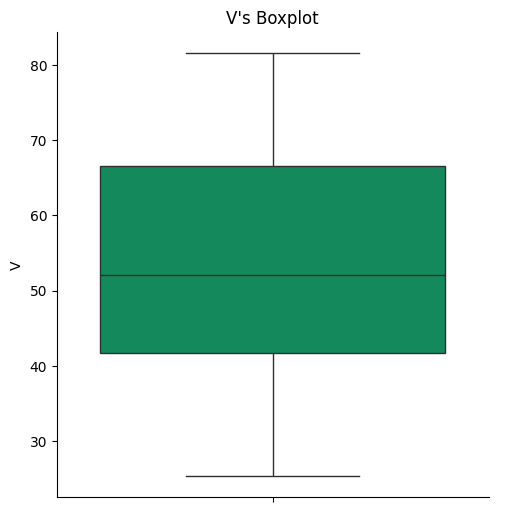

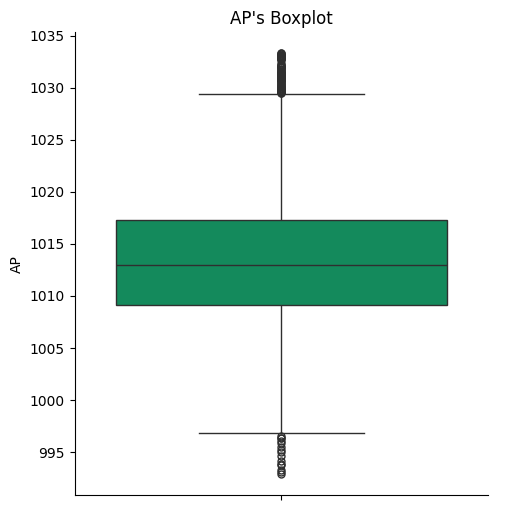

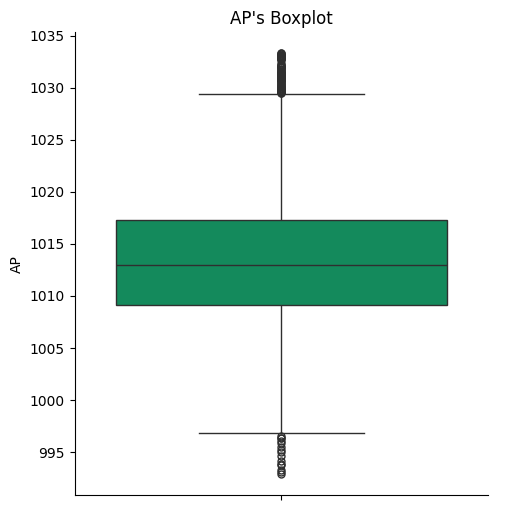

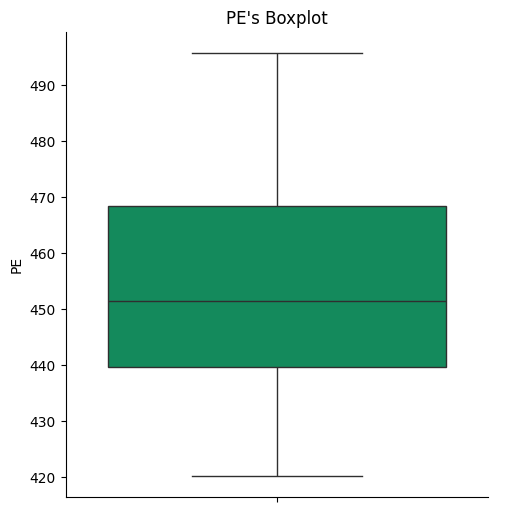

In [6]:
# Creting Boxplots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "box", color = "#009E60")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

##**Violin Plots**

#**Splitting the dataset into the Training and Test sets**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

#**Training the Decision Tree Regression model on the Training set**

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#**Predicting the Test set results**

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


# **Evaluating the Model Performance**

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.922905874177941

Training the Multiple Linear Regression model on the Training set


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9325315554761303

Training the Polynomial Regression model on the Training set


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9458193150560065

Training the Random Forest Regression model on the Training set


In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
     

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
    

0.9615908334363876